In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import webdataset as wds
import os
from itertools import islice

def normalize(image):
    image = image.astype(np.float32)
    image -= np.amin(image)
    image /= np.amax(image)
    return image

In [3]:
bucket = "ocro-iaa-sample"

# Sample Dataset for OCR Training

This is a small sample of a new OCR training dataset. This small sample contains:

- 160 books
- 1600 pages
- 134000 lines
- 515000 words

The final dataset probably will contain about 1000 times as much data.

Note that this data is currently unshuffled. Eventually, this data will be replaced with shuffled data for the complete dataset in the same bucket/directories.

The names of the tar archives may change, but the directory names will likely remain the same, so if you're going to start any training jobs, use the list of shards you get from "gsutil ls" as a starting point.

# Segmentation Data

This is page-wise segmentation and recognition data.

Each sample contains the original page ("jp2"), a masked line segmentation ("lines.png"), a masked word segmentaion ("words.png"), and a self-explanatory data structure describing the page, bounding boxes, and recognition results ("mp").

gs://ocro-iaa-sample/segs/segs-000015.tar
dict_keys(['__key__', '__url__', 'jp2', 'lines.png', 'mp', 'words.png'])


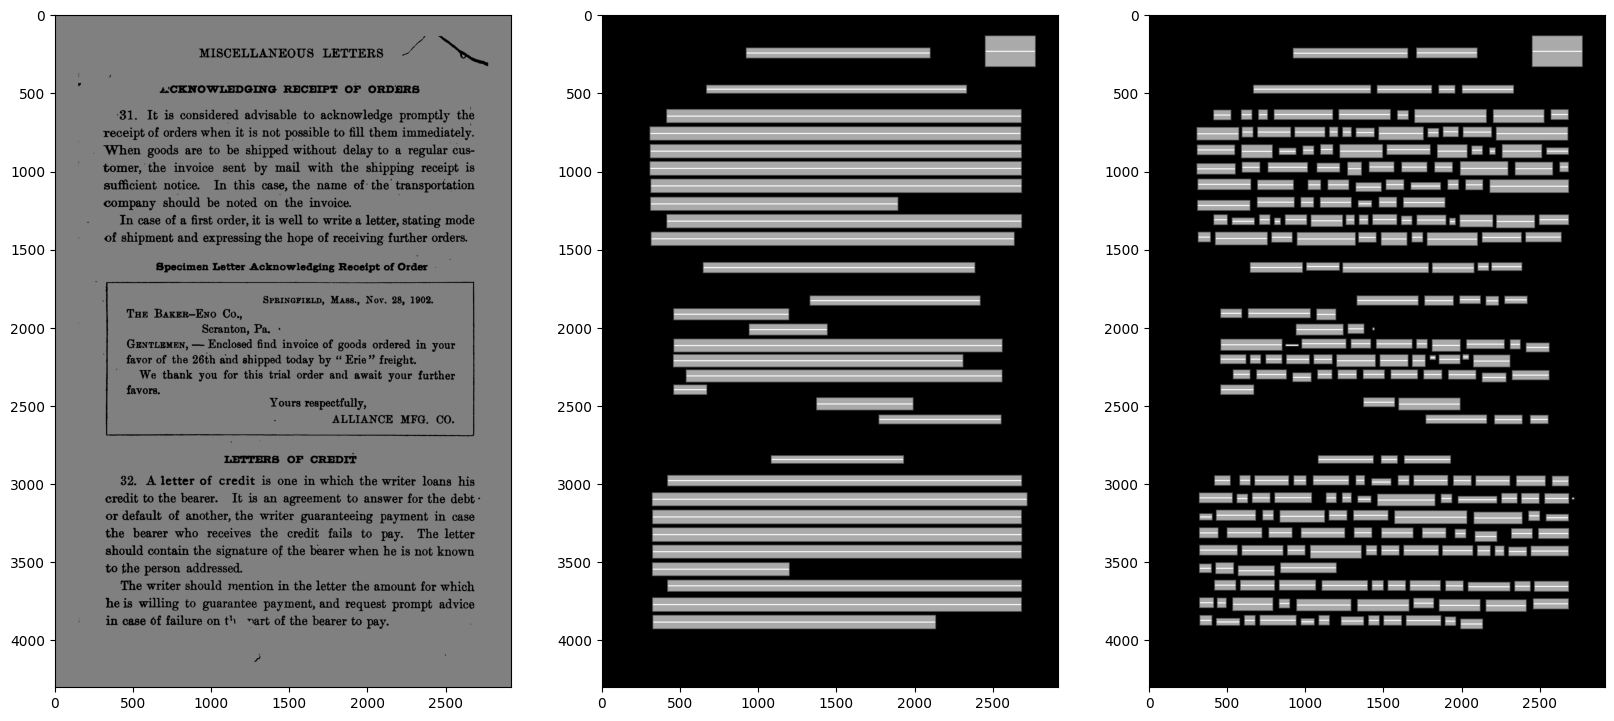

In [12]:
urls = sorted(os.popen(f"gsutil ls gs://{bucket}/segs/*.tar").read().split())
random.shuffle(urls)
url = urls[0]
print(url)
ds = wds.WebDataset(url).decode("rgb")
samples = list(islice(ds, 10))
random.shuffle(samples)
sample = samples[0]
print(sample.keys())
figsize(20, 10)
subplot(131); imshow(sample["jp2"])
subplot(132); imshow(normalize(sample["lines.png"]))
subplot(133); imshow(normalize(sample["words.png"]))

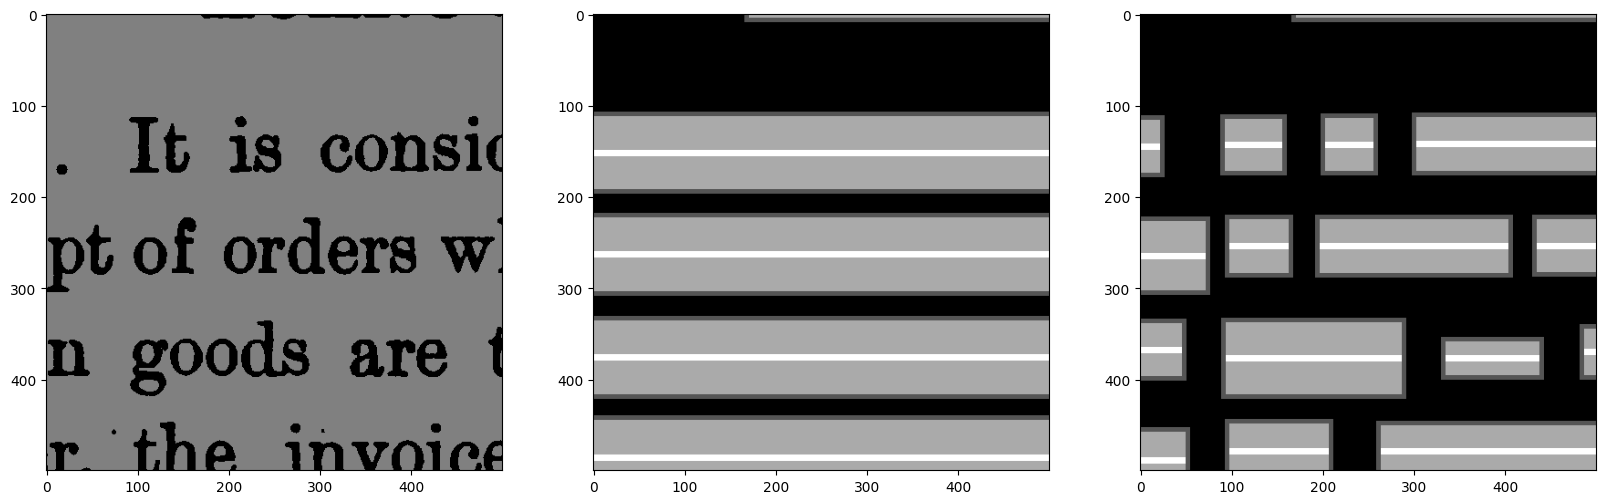

In [13]:
sl = (slice(500, 1000), slice(500, 1000))
subplot(131); imshow(sample["jp2"][sl])
subplot(132); imshow(normalize(sample["lines.png"][sl]))
subplot(133); imshow(normalize(sample["words.png"][sl]))

In [19]:
print(sample["mp"].keys())
print(sample["mp"]["identifier"])
print(sample["mp"]["lines"][:3])
print(sample["mp"]["words"][:3])
print(sample["mp"]["chars"][:3])

dict_keys(['size', 'lines', 'words', 'chars', 'identifier', 'pageno'])
modernletterwri00unkngoog
[{'l': 923, 't': 217, 'b': 281, 'r': 2099, 'text': 'MISCELLANEOUS LETTERS'}, {'l': 669, 't': 455, 'b': 506, 'r': 2332, 'text': 'iJCKNOWLEDGINa RECEIPT OF ORDERS'}, {'l': 2452, 't': 140, 'b': 336, 'r': 2772, 'text': 'X.'}]
[{'l': 923, 't': 219, 'b': 281, 'r': 1655, 'text': 'MISCELLANEOUS'}, {'l': 1712, 't': 217, 'b': 280, 'r': 2099, 'text': 'LETTERS'}, {'l': 669, 't': 455, 'b': 506, 'r': 1418, 'text': 'iJCKNOWLEDGINa'}]
[{'t': 221, 'b': 277, 'l': 923, 'r': 992, 'text': 'M'}, {'t': 220, 'b': 277, 'l': 996, 'r': 1028, 'text': 'I'}, {'t': 219, 'b': 278, 'l': 1034, 'r': 1076, 'text': 'S'}]


# Word Recognition Data

This is a dataset that contains isolated words and corresponding transcripts. The data is almost 100% correct because only dictionary words and partial hyphenated words are included in the dataset.

Bounding boxes are about 10 pixels beyond the original bounding box. You can recover the original bounding box by shrinking by 10 pixels on each side.

gs://ocro-iaa-sample/words/words-000056.tar
dict_keys(['__key__', '__url__', 'png', 'txt'])


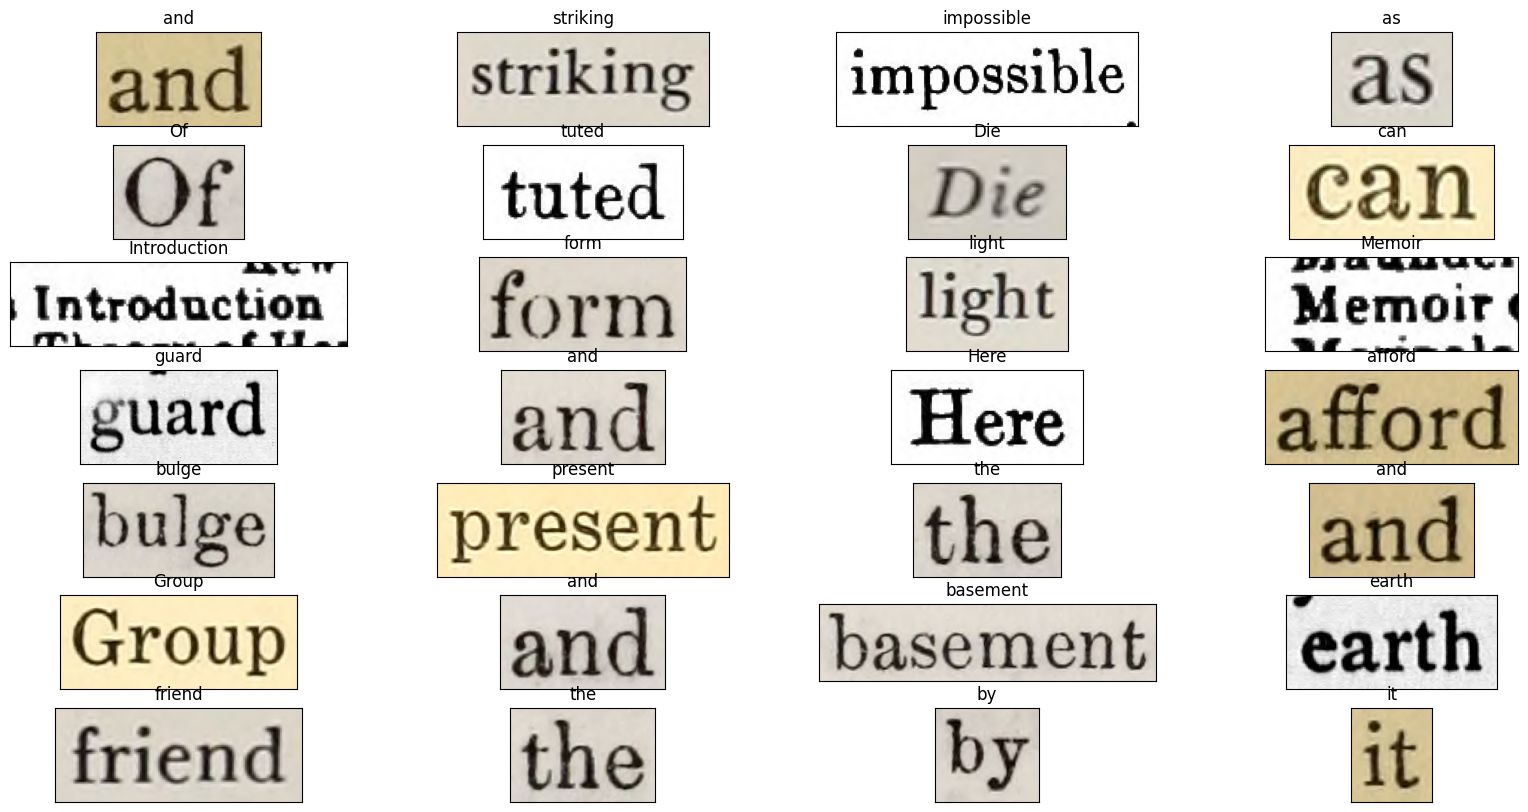

In [11]:
urls = sorted(os.popen(f"gsutil ls gs://{bucket}/words/*.tar").read().split())
random.shuffle(urls)
url = urls[0]
print(url)
ds = wds.WebDataset(url).decode("rgb")
src = list(islice(iter(ds), 50, 1000*77, 77))
random.shuffle(src)
i = 0
nrows, ncols = 7, 4
while i < nrows*ncols:
    sample = src[i]
    if i == 0:
        print(sample.keys())
    subplot(nrows, ncols, i+1)
    imshow(sample["png"]); xticks([]); yticks([])
    title(sample["txt"])
    i += 1

# Line Recognition Data

This is raw line recognition data as transcribed by another system, sometimes with manual corrections. A small but significant percentage of the text lines have errors in them.

Bounding boxes are about 10 pixels beyond the original bounding box. You can recover the original bounding box by shrinking by 10 pixels on each side.

gs://ocro-iaa-sample/lines/lines-000016.tar
dict_keys(['__key__', '__url__', 'png', 'txt'])


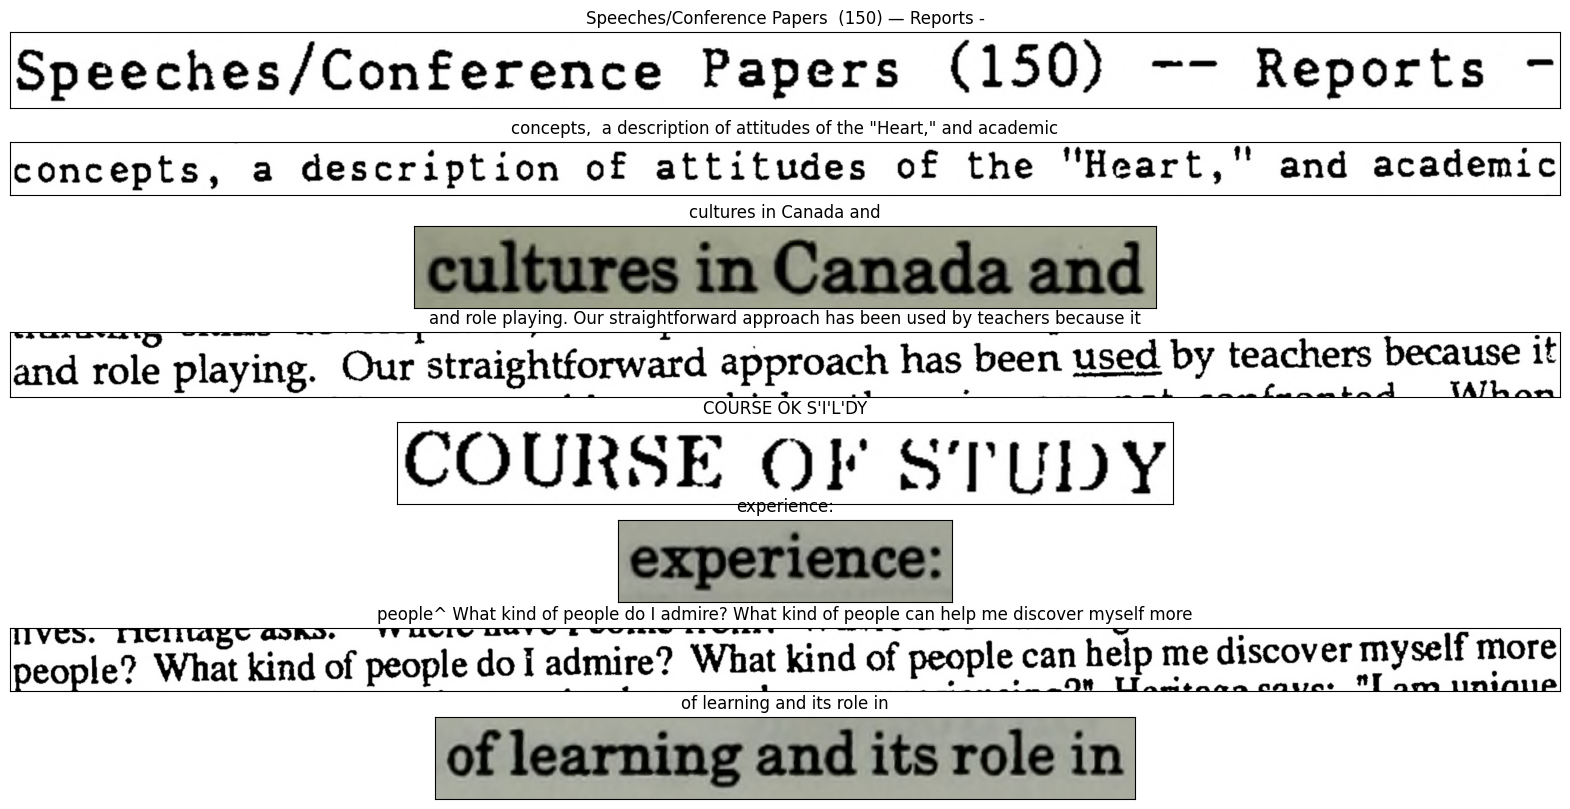

In [9]:
urls = sorted(os.popen(f"gsutil ls gs://{bucket}/lines/*.tar").read().split())
random.shuffle(urls)
url = urls[0]
print(url)
ds = wds.WebDataset(url).decode("rgb")
src = list(islice(iter(ds), 50, 1000*33, 33))
random.shuffle(src)
i = 0
nrows, ncols = 8, 1
while i < nrows*ncols:
    sample = src[i]
    if i == 0:
        print(sample.keys())
    subplot(nrows, ncols, i+1)
    imshow(sample["png"]); xticks([]); yticks([])
    title(sample["txt"])
    i += 1